In [14]:
0.00392 * 416 * 416

678.37952

In [ ]:
320 x 320 (high speed, less accuracy)
416 x 416 (moderate speed, moderate accuracy)
608 x 608 (less speed, high accuracy)

In [95]:
import cv2
import numpy as np
net = cv2.dnn.readNetFromDarknet("cfg_mask/yolov3-tiny.cfg","yolov3-tiny_60000.weights")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

classes = [line.strip() for line in open("cfg_mask/obj.names")]
colors = [(0,0,255),(255,0,0),(0,255,0)]

def yolo_detect(frame):
    # forward propogation
    img = cv2.resize(frame, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape # 0.00392
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # get detection boxes
    class_ids = []
    confidences = []
    boxes = []
    
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            
            confidence = scores[class_id]
            if confidence > 0.3:
                
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                
                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
                
    # draw boxes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
    return img

In [96]:
img = cv2.imread("/Users/davidchiu/Desktop/test.jpg")

In [97]:
img.shape

(675, 900, 3)

Populating the interactive namespace from numpy and matplotlib


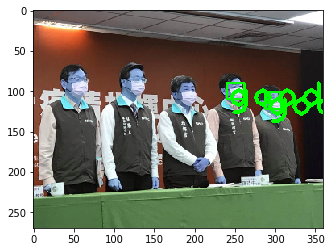

In [98]:
%pylab inline
from matplotlib import pyplot as plt
a = yolo_detect(img)
plt.imshow(a)
#cv2.imshow("Frame", a)

In [99]:
frame.shape

(720, 1280, 3)

In [100]:
import cv2
import imutils
import time

VIDEO_IN = cv2.VideoCapture(0)

while True:
    hasFrame, frame = VIDEO_IN.read()
    
    img = yolo_detect(frame)
    cv2.imshow("Frame", imutils.resize(img, width=850))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
VIDEO_IN.release()
cv2.destroyAllWindows()